<a href="https://colab.research.google.com/github/julianovale/ferramentas/blob/main/Semana06_PO450_Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juliano Cesar Rodrigues Vale - Atividade 4

# RA: 265750

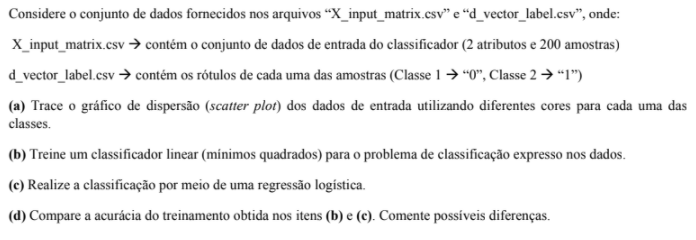

In [73]:
# importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [74]:
# leitura dos dados

X_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana06/X_input_matrix.csv'
d_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana06/d_vector_label.csv'
x = np.loadtxt(X_url, delimiter=',')
d = np.loadtxt(d_url, delimiter=',')
dfx = pd.DataFrame(x, columns=['Var01','Var02'])
dfd = pd.DataFrame(d, columns=['d'])
dflin = dfd.replace(0.0, -1.0)
dflin.columns = ['dlin']
df = pd.concat([dfx, dfd, dflin], axis=1)
df

,Var01,Var02,d,dlin
0,0.550899,0.147259,0.0,-1.0
1,5.430608,7.988073,1.0,1.0
2,19.439034,20.694139,1.0,1.0
3,-0.605586,-0.441372,0.0,-1.0
4,5.378262,4.693548,1.0,1.0
...,...,...,...,...
195,0.057712,-0.439136,0.0,-1.0
196,4.224115,4.414449,1.0,1.0
197,19.023131,20.497668,1.0,1.0
198,-1.585558,-0.415866,0.0,-1.0


## Item (a)

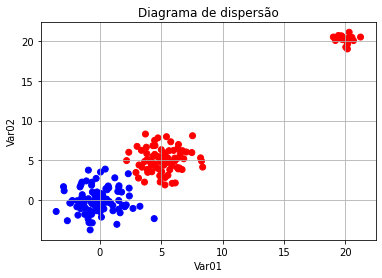

In [75]:
# plotando scatterplot

colors = {1.0:'red', 0.0:'blue'}
plt.grid()
plt.scatter(df['Var01'],df['Var02'],c=df['d'].map(colors))
plt.xlabel('Var01')
plt.ylabel('Var02')
plt.title('Diagrama de dispersão')
plt.show()

## Item (b)

In [76]:
# splitando treinamento e teste
prop_test = 0.3
X_train, X_test, d_train, d_test = train_test_split(df[['Var01','Var02']], df['dlin'], test_size = prop_test)

In [77]:
# criando instância e ajustando o modelo
model_reg_linear = LinearRegression()
model_reg_linear.fit(X_train, d_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# predizendo e calculando acurácia
y_hat_train = model_reg_linear.predict(X_train)
acc_train = model_reg_linear.score(X_train, d_train)
print('Acurácia do treinamento: ', acc_train)

Acurácia do treinamento:  0.4805898213074315


In [79]:
# predizendo e calculando acurácia
y_hat_test = model_reg_linear.predict(X_test)
acc_test = model_reg_linear.score(X_test, d_test)
print('Acurácia do teste: ', acc_test)

Acurácia do teste:  0.40194869887768525


## Item (c)

In [80]:
# splitando treinamento e teste
prop_test = 0.3
X_train, X_test, d_train, d_test = train_test_split(df[['Var01','Var02']], df['d'], test_size = prop_test)

In [81]:
# criando instância e ajustando o modelo
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, d_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# predizendo e calculando acurácia
y_hat_train = logisticRegr.predict(X_train)
acc_train = logisticRegr.score(X_train, d_train)
print('Acurácia do treinamento: ', acc_train)

Acurácia do treinamento:  0.9928571428571429


In [83]:
# predizendo e calculando acurácia
y_hat_test = logisticRegr.predict(X_test)
acc_test = logisticRegr.score(X_test, d_test)
print('Acurácia do teste: ', acc_test)

Acurácia do teste:  1.0


## Item (d)

Comparando-se as acurácias obtidas com a regressão least squares e regressão logística percebe-se que, para o conjunto de dados proposto, o poder de predição da regressão logística foi superior, atingindo no conjunto de teste uma acurácia de 1.0 (predizendo com acerto todas as amostras), contra 0.387 para a regressão least squares. (note-se que para a regressão least squares os rótulos 0 foram convertidos para -1, conforme indicado na aula).

No diagrama de dispersão nota-se que para a classe 2 (em vermelho) há dois subconjuntos de dados passíveis de identificação visual. Um deles com médias (inferida visualmente) em aproximados (Var1, Var2) = (5, 5) e um segundo subconjunto com média (Var1, Var2) = (20, 20). Os dados desse último subconjunto são outliers (o que pode ser verificado no boxplot abaixo).

O subconjunto da classe 1 (em azul) aparenta ser mais homogêneo, com médias (inferidas visualmente) em aproximados (Var1, Var2) = (0, 0).

Uma das conclusões possíveis do exercício é a de que a regressão logística tende a ser menos afetada pelos outliers do que a regressão least squares ou, pelo menos, que isso ocorreu neste conjunto de dados, nos mostrando que para um determinado conjunto deve-se testar mais de um classificador/método/conjunto de parâmetros.

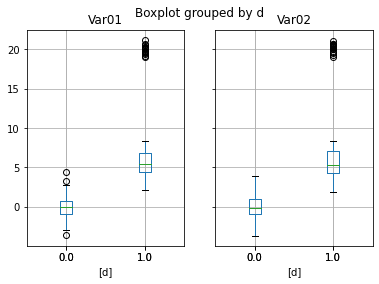

In [84]:
dfbp = df[['Var01', 'Var02', 'd']].copy()
dfbp.boxplot(by='d');